# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('previsao_da_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

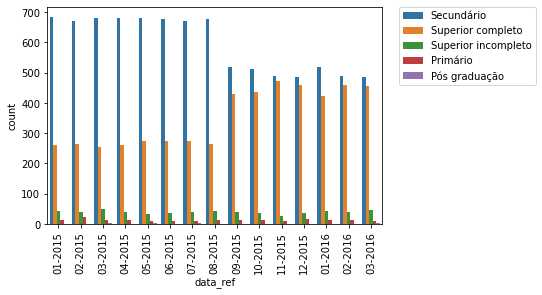

In [7]:
ax = sns.countplot(
    data=df,
    x='data_ref',
    hue='educacao'
)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

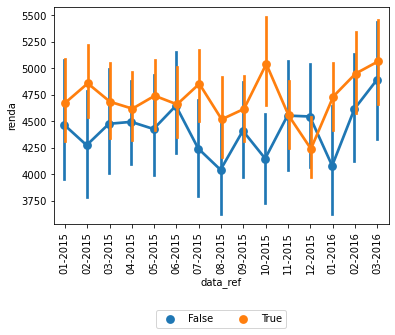

In [8]:
ax = sns.pointplot(
    data=df,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
    ci=95
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.30), ncol=3)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.50), ncol=3)